<a href="https://colab.research.google.com/github/Dansouza-web/-Projeto-NBA-Data-SCIENCE-2025/blob/main/Previs%C3%A3o_de_Mvp_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('df_mvp.csv')

In [4]:
features = [
    'GP', 'MIN', 'PTS', 'REB', 'AST', 'STL',
    'BLK', 'TOV', 'FG_PCT', 'FG3_PCT', 'FT_PCT',
    'PLUS_MINUS', 'EFF'
]

x = df[features]
y = df['IS_MVP']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

In [6]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = modelo.predict(X_test)
print('Matriz Confusão:')
print(confusion_matrix(y_test,y_pred))
print('\nRelatório de classificação')
print(classification_report(y_test, y_pred, digits=3))

Matriz Confusão:
[[1733    1]
 [   3    0]]

Relatório de classificação
              precision    recall  f1-score   support

           0      0.998     0.999     0.999      1734
           1      0.000     0.000     0.000         3

    accuracy                          0.998      1737
   macro avg      0.499     0.500     0.499      1737
weighted avg      0.997     0.998     0.997      1737



<ipython-input-8-bc98bd0650ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia, x='Importancia', y='Variavel', palette='coolwarm')


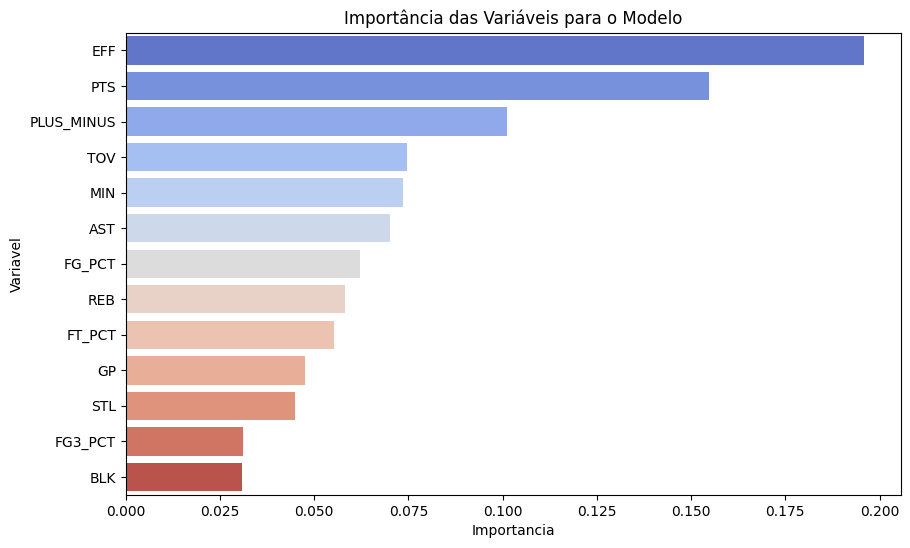

In [8]:
importancia = pd.DataFrame({
    'Variavel': features,
    'Importancia': modelo.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importancia, x='Importancia', y='Variavel', palette='coolwarm')
plt.title('Importância das Variáveis para o Modelo')
plt.show()


#PREVENDO O MVP DE 2025 DA NBA

In [9]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.9/284.9 kB 7.7 MB/s eta 0:00:00


In [10]:
from nba_api.stats.endpoints import leaguedashplayerstats
import time

In [11]:
#puxando api de 2025 da nba
stats_2025 = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2024-25',
    season_type_all_star='Regular Season'

)
df_2025 = stats_2025.get_data_frames()[0]
df_2025['Season'] = '2024-25'

In [12]:
df_2025['PLAYER_NAME'] = df_2025['PLAYER_NAME'].str.strip().str.lower()

df_2025['EFF'] = (
     df_2025['PTS'] + df_2025['REB'] + df_2025['AST'] +
    df_2025['STL'] + df_2025['BLK'] - df_2025['TOV']
)

In [13]:
X_2025 = df_2025[features]

In [14]:
df_2025['MVP_PROB'] = modelo.predict_proba(X_2025)[:,1]
df_2025['PREDICTED_MVP'] = modelo.predict(X_2025)

In [15]:
candidatos = df_2025.sort_values(by='MVP_PROB', ascending=False)
candidatos[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PTS', 'REB', 'AST', 'EFF', 'MVP_PROB']].head(10)

,PLAYER_NAME,TEAM_ABBREVIATION,PTS,REB,AST,EFF,MVP_PROB
423,nikola jokić,DEN,2071,892,716,3621,0.63
490,shai gilgeous-alexander,OKC,2484,379,486,3374,0.29
180,giannis antetokounmpo,MIL,2036,798,433,3197,0.17
523,trae young,ATL,1841,236,880,2705,0.11
241,james harden,LAC,1802,456,687,2777,0.07
29,anthony edwards,MIN,2177,450,359,2879,0.05
69,cade cunningham,DET,1830,425,638,2708,0.04
476,rudy gobert,MIN,866,785,127,1849,0.03
19,alperen sengun,HOU,1451,786,372,2560,0.03
251,jarrett allen,CLE,1103,798,158,2112,0.02


#CONCLUIMOS QUE EM QUESTÃO DE DADOS E ESTÁTISCAS NIKOLA JOKIC MERECIA O PRÊMIO DE MVP